In [1]:
# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16

# Warning
import warnings
warnings.filterwarnings("ignore")

# Main
import os
import glob
import cv2
import numpy as np
import pandas as pd
import gc
import string
import time
import random
from PIL import Image
from tqdm import tqdm
tqdm.pandas()

# Visualization
import matplotlib
import matplotlib.pyplot as plt
!pip install plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.manifold import TSNE

# Model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

In [3]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Getting images of folder ",i)
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir) 

Getting images of folder  0
Getting images of folder  1
Getting images of folder  2
Getting images of folder  3
Getting images of folder  4
Getting images of folder  5
Getting images of folder  6
Getting images of folder  7
Getting images of folder  8
Getting images of folder  9
Getting images of folder  10
Getting images of folder  11
Getting images of folder  12
Getting images of folder  13
Getting images of folder  14
Getting images of folder  15
Getting images of folder  16
Getting images of folder  17
Getting images of folder  18
Getting images of folder  19
Getting images of folder  20
Getting images of folder  21
Getting images of folder  22
Getting images of folder  23
Getting images of folder  24
Getting images of folder  25
Getting images of folder  26
Getting images of folder  27
Getting images of folder  28


In [4]:
len(X) , len(y)

(87000, 87000)

In [5]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

In [6]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [7]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False
    
x = base_model.output
x = Flatten()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(29, activation='softmax')(x)

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [12]:
# Compile and train the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('asl_vgg16_best_weights.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [13]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/20
1958/1958 [==============================] - 25s 10ms/step - loss: 1.5136 - accuracy: 0.5236 - val_loss: 0.6822 - val_accuracy: 0.7826
Epoch 2/20
1958/1958 [==============================] - 16s 8ms/step - loss: 0.8016 - accuracy: 0.7281 - val_loss: 0.4097 - val_accuracy: 0.8704
Epoch 3/20
1958/1958 [==============================] - 16s 8ms/step - loss: 0.6298 - accuracy: 0.7842 - val_loss: 0.3295 - val_accuracy: 0.8997
Epoch 4/20
1958/1958 [==============================] - 18s 9ms/step - loss: 0.5376 - accuracy: 0.8150 - val_loss: 0.2695 - val_accuracy: 0.9158
Epoch 5/20
1958/1958 [==============================] - 16s 8ms/step - loss: 0.4846 - accuracy: 0.8320 - val_loss: 0.2493 - val_accuracy: 0.9135
Epoch 6/20
1958/1958 [==============================] - 16s 8ms/step - loss: 0.4429 - accuracy: 0.8483 - val_loss: 0.2185 - val_accuracy: 0.9284
Epoch 7/20
1958/1958 [==============================] - 16s 8ms/step - loss: 0.4168 - accuracy: 0.8571 - val_loss: 0.1836 - val_a

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

272/272 [==============================] - 2s 7ms/step - loss: 0.0964 - accuracy: 0.9698
Test accuracy: 0.9697701334953308
Test loss: 0.09637803584337234


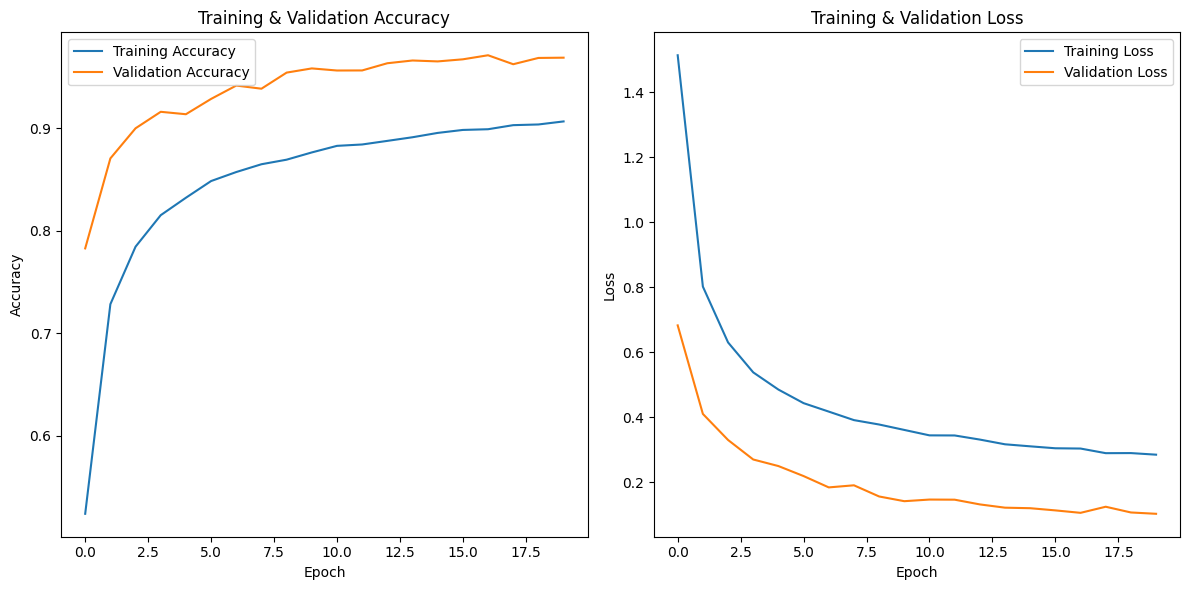

In [15]:
def plot_results(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results(history)
